# Task 1 :- Prediction using Supervised ML

Performed By : Shashwat Mishra

In [45]:
# importing all libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [46]:
# importing data from link

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [49]:
data.shape

(25, 2)

In [50]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

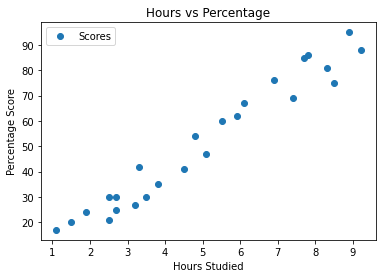

In [51]:
# Plotting the distribution of scores

data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [52]:
x = data.iloc[:, :1].values      # all values of no of hours 
y = data.iloc[:, 1].values       # all values of no of percentage

In [53]:
# We have split our data into training and testing sets, and now finally the time to train our algorithm.

from sklearn.model_selection import train_test_split    
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)   

In [54]:
# Training simple linear reression model on sample training set:

from sklearn.linear_model import LinearRegression    
regressor = LinearRegression()    
regressor.fit(x_train, y_train)   
  
print("Training ... Completed !.")  

Training ... Completed !.


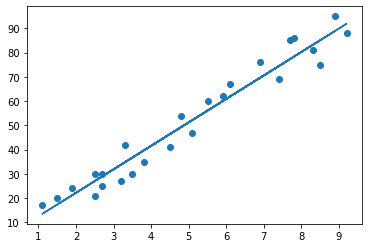

In [55]:
# Plot the regression line on the whole dataset :

line = regressor.coef_*x+regressor.intercept_  
plt.scatter(x, y)  
plt.plot(x, line);  
plt.show()  

In [56]:
print(x_test)   

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [57]:
#Predicting the test set result

y_pred = regressor.predict(x_test)  
print(y_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


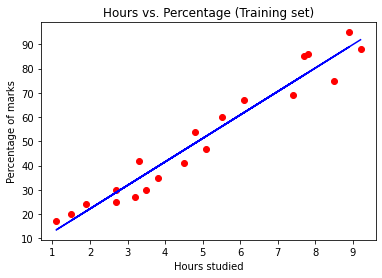

In [58]:
# Visualising the training set result

plt.scatter(x_train, y_train , color = 'red')
plt.plot(x_train, regressor.predict(x_train) , color = 'blue')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

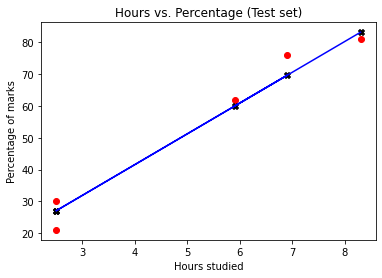

In [59]:
#Visualising the Test set results


pp = regressor.predict(x_test)
plt.scatter(x_test, y_test, color = 'red', marker='o')
plt.scatter(x_test, pp, color = 'black', marker='X')
plt.plot(x_test, pp, color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

In [60]:
# copparing actual value with preicted ones

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
df  

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [61]:
# ppredicting the score

hours = [[9.25]]  
own_pred = regressor.predict(hours)  
print("Number of hours = {}".format(hours))  
print("Prediction Score = {}".format(own_pred[0]))  

Number of hours = [[9.25]]
Prediction Score = 92.38611528261494


In [62]:
# Getting error

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

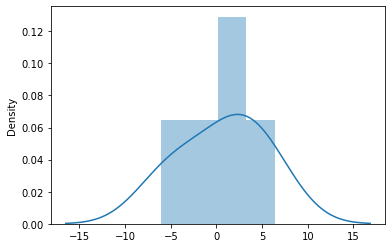

In [65]:
# Histogram of the residuals
# Normally distribution shows that its a good sign
# It shows that the model is a correct choice
sns.distplot((y_test-y_pred), bins=4)